In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [43]:
data = pd.read_csv('salary.csv')
X = data['experience'].values
Y = data['salary'].values

mean_x = np.mean(X)
mean_y = np.mean(Y)

In [45]:
n = len(X)
num = 0
denom = 0

for i in range(n):
    num += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2

m = num / denom
c = mean_y - (m * mean_x)

print(f'slope = {m}\n constant = {c}')

slope = 1.5670982931135964
 constant = -0.035638610947617444


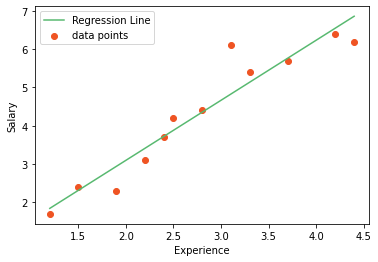

In [78]:
x = np.linspace (X[0], X[9])
y = c + m * X
plt.plot(X, y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='#ef5423', label='data points')

plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

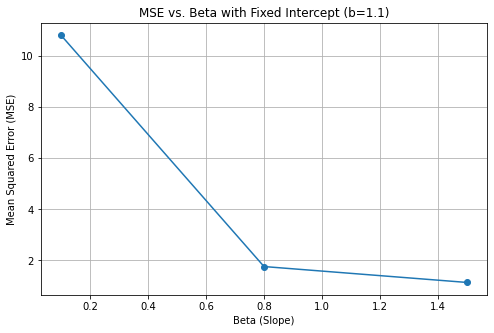

In [47]:
b = 1.1
betas = [0.1, 0.8, 1.5]
mse_values = []

for beta in betas:
    y_pred = b + beta * X
    mse = np.mean((Y - y_pred) ** 2)
    mse_values.append(mse)

plt.figure(figsize=(8, 5))
plt.plot(betas, mse_values, marker='o')
plt.xlabel('Beta (Slope)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Beta with Fixed Intercept (b=1.1)')
plt.grid(True)
plt.show()

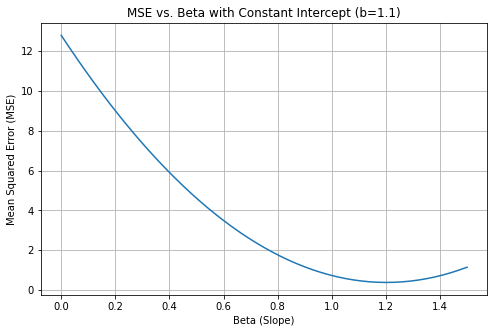

In [48]:
b = 1.1
betas = np.arange(0, 1.51, 0.01)
mse_values = []

for beta in betas:
    # Calculate predictions
    y_pred = b + beta * X
    
    # Calculate MSE
    mse = np.mean((Y - y_pred)**2)
    mse_values.append(mse)

# Plot beta vs. MSE
plt.figure(figsize=(8, 5))
plt.plot(betas, mse_values)
plt.xlabel('Beta (Slope)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Beta with Constant Intercept (b=1.1)')
plt.grid(True)
plt.show()

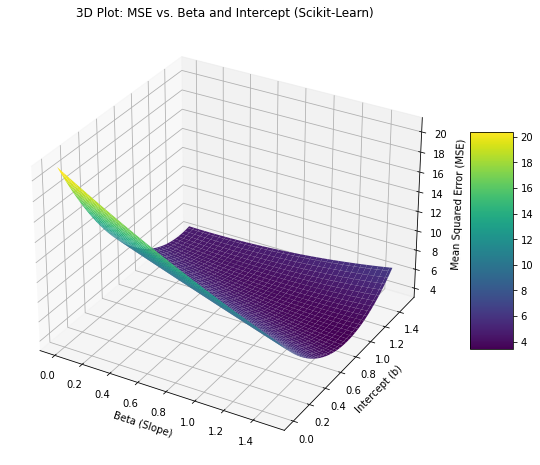

In [85]:
betas = np.arange(0, 1.51, 0.01)
intercepts = np.arange(0, 1.51, 0.01)

# Initialize an empty array to store MSE values
mse_values = np.zeros((len(betas), len(intercepts)))

# Calculate MSE for different combinations of beta and intercept using scikit-learn
for i, beta in enumerate(betas):
    for j, intercept in enumerate(intercepts):
        # Create a Linear Regression model
        y_pred = intercept + beta * X
        
        # Calculate MSE
        mse = np.mean((Y - y_pred)**2)
        mse_values[i, j] = mse
# Create a meshgrid for beta and intercept values
BETA, INTERCEPT = np.meshgrid(betas, intercepts)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(BETA, INTERCEPT, mse_values, cmap='viridis')

# Add labels and title
ax.set_xlabel('Beta (Slope)')
ax.set_ylabel('Intercept (b)')
ax.set_zlabel('Mean Squared Error (MSE)')
ax.set_title('3D Plot: MSE vs. Beta and Intercept (Scikit-Learn)')

# Add color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()




In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a Linear Regression model
model = LinearRegression()
model.fit(X.reshape(-1, 1), Y)

# Get the coefficients
sklearn_beta = model.coef_[0]
sklearn_intercept = model.intercept_

# Calculate predictions using scikit-learn model
y_pred_sklearn = model.predict(X.reshape(-1, 1))

# Calculate MSE for scikit-learn model
mse_sklearn = mean_squared_error(Y, y_pred_sklearn)

print(f"Scikit-learn Beta (Slope): {sklearn_beta}")
print(f"Scikit-learn Intercept: {sklearn_intercept}")
print(f"Scikit-learn MSE: {mse_sklearn}")


Scikit-learn Beta (Slope): 1.567098293113596
Scikit-learn Intercept: -0.035638610947616556
Scikit-learn MSE: 0.23366710810280558


SGD without sklearn

Custom B0: [0.20405108]
Custom B1: [1.49684292]
Custom Final MSE: [0.41232751]


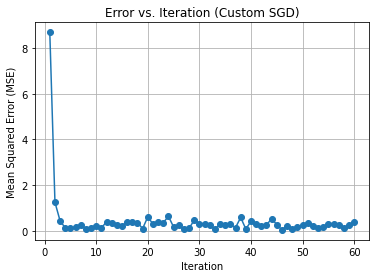

In [75]:
learning_rate = 0.01
iterations = 60
n = len(X)

# Initialize B0 and B1
B0 = 0
B1 = 0

# Lists to store error and iteration values
error_history = []

for iteration in range(iterations):
    total_error = 0
    for i in range(n):
        # Randomly select a data point
        random_index = np.random.randint(0, n)
        x_i = X[random_index]
        y_i = Y[random_index]
        
        # Calculate the predicted value
        y_pred = B0 + B1 * x_i
        
        # Update B0 and B1 using gradient descent
        B0 = B0 - learning_rate * (y_pred - y_i)
        B1 = B1 - learning_rate * (y_pred - y_i) * x_i
        
        # Calculate the error for this data point
        total_error += (y_pred - y_i)**2
    
    # Calculate the mean squared error for the entire dataset
    mse = total_error / n
    error_history.append(mse)

# Plot error versus iteration
print(f"Custom B0: {B0}")
print(f"Custom B1: {B1}")
print(f"Custom Final MSE: {error_history[-1]}")

plt.plot(range(1, iterations + 1), error_history, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Error vs. Iteration (Custom SGD)')
plt.grid(True)
plt.show()

SGD with sklearn

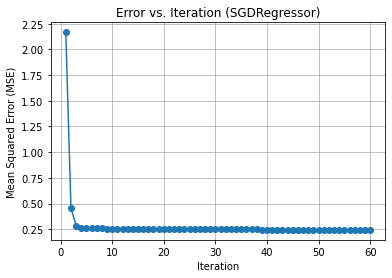

Scikit-learn B0: 0.21932403789698152
Scikit-learn B1: 1.4676005515303967
Scikit-learn Final MSE: 0.24342409619084693


In [79]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

sgd = SGDRegressor(max_iter=5, tol=None, eta0=0.01, random_state=42, learning_rate='constant')

# Lists to store error and iteration values
error_history_sklearn = []

# Perform 60 iterations of 5 epochs
for _ in range(60):
    sgd.partial_fit(X.reshape(-1, 1), Y)
    y_pred_sklearn = sgd.predict(X.reshape(-1, 1))
    mse_sklearn = mean_squared_error(Y, y_pred_sklearn)
    error_history_sklearn.append(mse_sklearn)

# Plot error versus iteration using scikit-learn
plt.plot(range(1, len(error_history_sklearn) + 1), error_history_sklearn, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Error vs. Iteration (SGDRegressor)')
plt.grid(True)
plt.show()

# Get the final B0 and B1 values
B0_sklearn = sgd.intercept_[0]
B1_sklearn = sgd.coef_[0]

print(f"Scikit-learn B0: {B0_sklearn}")
print(f"Scikit-learn B1: {B1_sklearn}")
print(f"Scikit-learn Final MSE: {error_history_sklearn[-1]}")


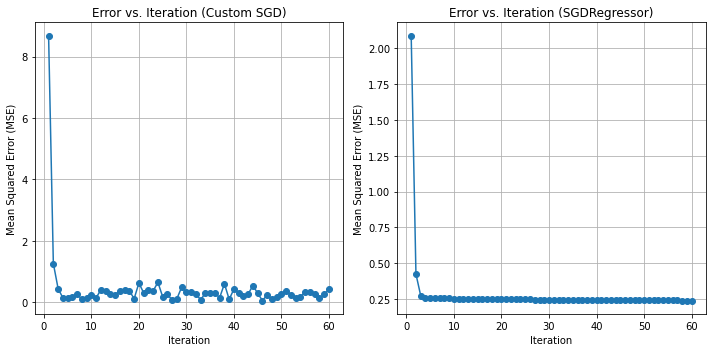

In [76]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, iterations + 1), error_history, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Error vs. Iteration (Custom SGD)')
plt.grid(True)

# Plot beta (B1) vs. error for scikit-learn
plt.subplot(1, 2, 2)
plt.plot(range(1, len(error_history_sklearn) + 1), error_history_sklearn, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Error vs. Iteration (SGDRegressor)')
plt.grid(True)

plt.tight_layout()
plt.show()